**imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense

**Load** **Datasets**

In [2]:
data = pd.read_csv('BankNote_Authentication.csv')

In [3]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
data.shape

(1372, 5)

**Exploration Data Analysis**

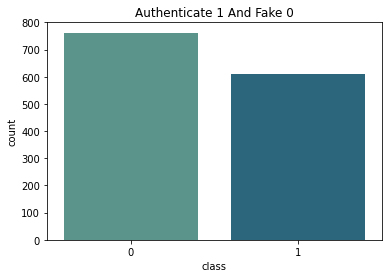

In [5]:
plt.title('Authenticate 1 And Fake 0')
sns.countplot(x='class', data= data, palette = 'crest')
plt.show()

**Standardize Data**

In [6]:
sc= StandardScaler()

In [7]:
sc.fit(X= data.drop('class', axis = 1))
standard_data = sc.transform(X= data.drop('class', axis = 1))

In [8]:
type(standard_data)

numpy.ndarray

**Convert Scaled data into Data Frame**

In [9]:
scaled_dataframe = pd.DataFrame(data= standard_data, columns = data.columns[:-1])

In [10]:
scaled_dataframe.head()

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [11]:
X= scaled_dataframe
y= data['class']

**Tensorflow accepts the data in numpy array so convert into array**

In [12]:
X = X.values
y = y.values

In [13]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [14]:
X_train.shape

(1097, 4)

In [15]:
X_test.shape

(275, 4)

In [16]:
VALIDATION_SIZE = 200
x_val = X_train[:VALIDATION_SIZE]
y_val = y_train[:VALIDATION_SIZE]
x_val.shape


(200, 4)

In [17]:
X_train = X_train[VALIDATION_SIZE:]
y_train = y_train[VALIDATION_SIZE:]
X_train.shape

(897, 4)

In [18]:
model_1 = Sequential([
    
    Dense(units =20, input_dim =4, activation ='relu', name = 'm1_hidden1'),
    Dense(units =10, activation ='relu', name = 'm1_hidden2'),
    Dense(units =1, activation = 'sigmoid', name = 'm1_ouput')
    ])

model_1.compile(optimizer='adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy'])

In [19]:
nr_epochs = 25

history=model_1.fit(X_train, y_train, batch_size=30, epochs=nr_epochs,verbose=1, validation_data=(x_val, y_val))


Epoch 1/25
30/30 [==============================] - 13s 17ms/step - loss: 0.6461 - accuracy: 0.4737 - val_loss: 0.5926 - val_accuracy: 0.6500
Epoch 2/25
30/30 [==============================] - 0s 3ms/step - loss: 0.5587 - accuracy: 0.7464 - val_loss: 0.4993 - val_accuracy: 0.8550
Epoch 3/25
30/30 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.9019 - val_loss: 0.4088 - val_accuracy: 0.9250
Epoch 4/25
30/30 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.9225 - val_loss: 0.3222 - val_accuracy: 0.9450
Epoch 5/25
30/30 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.9311 - val_loss: 0.2492 - val_accuracy: 0.9650
Epoch 6/25
30/30 [==============================] - 0s 2ms/step - loss: 0.2454 - accuracy: 0.9474 - val_loss: 0.1911 - val_accuracy: 0.9750
Epoch 7/25
30/30 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.9528 - val_loss: 0.1466 - val_accuracy: 0.9750
Epoch 8/25
30/30 [

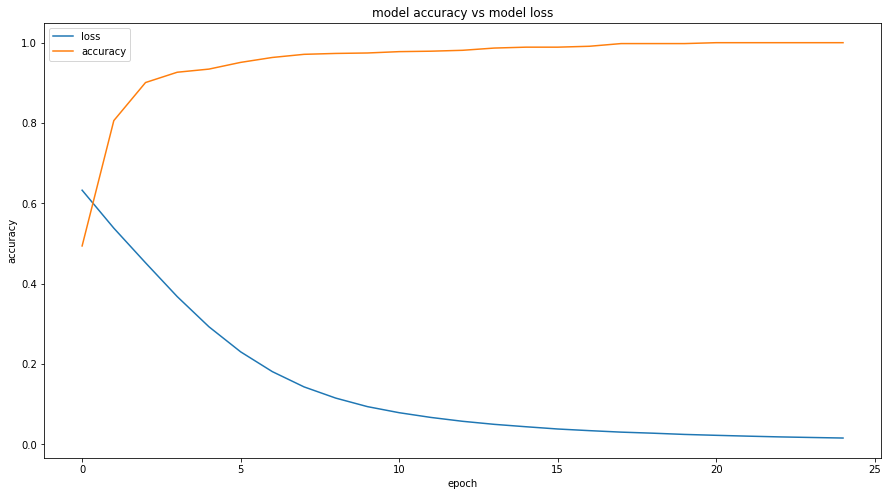

In [20]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy vs model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

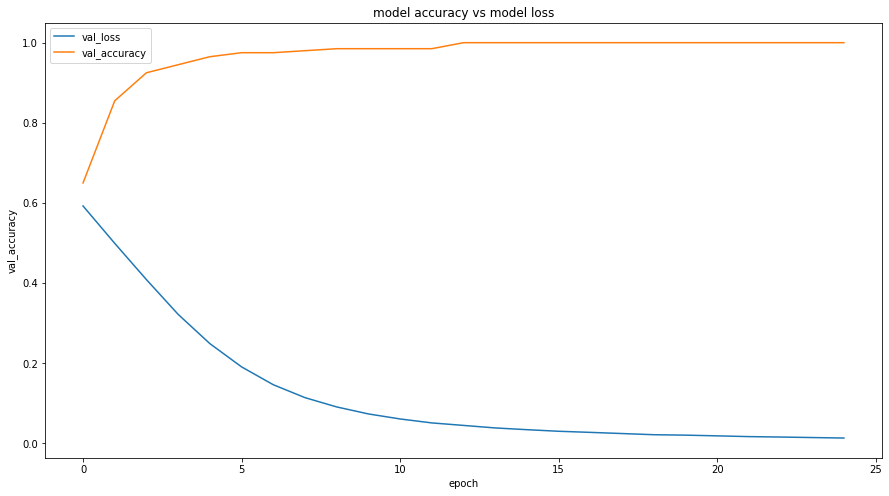

In [21]:
plt.figure(figsize=(15,8))
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy vs model loss')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper left')
plt.show()

In [22]:
y_predict = model_1.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [23]:
print(confusion_matrix(y_test,y_predict))

[[148   0]
 [  0 127]]


In [24]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [25]:
score = model_1.evaluate(X_test, y_test, verbose=0)
print('Test score: %.3f'%(score[0]))
print('Test accuracy: %.3f'%(score[1]))

Test score: 0.019
Test accuracy: 1.000
